In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/banking_transactions_output_data/customer_behavior_df.csv')
df.drop(columns='income', inplace=True)
df.head()

,cust_id,hasSavings,incomeToSavingsRatio,hasCredit,creditSpendtoLimitRatio,hasChecking,averageMonthlySpending,numTnxMonthlyAverage
0,1362691,No,0.000000,No,0.000000,No,0.000000,0.000000
1,1362487,Yes,-196.441989,Yes,-0.046533,Yes,-114.890833,4.333333
2,1363160,Yes,93716.210526,Yes,0.031669,No,0.000000,0.000000
3,1362752,Yes,63066.813671,Yes,0.200554,Yes,-40.327500,7.750000
4,1362548,Yes,141441.269841,Yes,0.173563,Yes,-494.062727,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cust_id                  747 non-null    int64  
 1   hasSavings               747 non-null    object 
 2   incomeToSavingsRatio     747 non-null    float64
 3   hasCredit                747 non-null    object 
 4   creditSpendtoLimitRatio  747 non-null    float64
 5   hasChecking              747 non-null    object 
 6   averageMonthlySpending   747 non-null    float64
 7   numTnxMonthlyAverage     747 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 46.8+ KB


In [4]:
numerical = df['hasSavings'].apply(lambda x: 0 if x == 'No' else 1)
numerical

0      0
1      1
2      1
3      1
4      1
      ..
742    0
743    1
744    0
745    0
746    0
Name: hasSavings, Length: 747, dtype: int64

In [5]:
df.describe()

,cust_id,incomeToSavingsRatio,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage
count,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000
mean,1.362991e+06,1.438181e+04,-0.005156,-89.862092,6.173348
std,2.925255e+02,1.650565e+05,0.102669,199.535463,7.910584
min,1.362480e+06,-1.047294e+05,-1.000000,-1439.755000,0.000000
25%,1.362732e+06,0.000000e+00,-0.019007,-171.391310,0.000000
50%,1.362993e+06,0.000000e+00,0.000000,-9.595000,8.250000
75%,1.363244e+06,6.565271e+02,0.001192,0.000000,9.000000
max,1.363495e+06,4.032900e+06,0.938203,1625.430000,99.000000


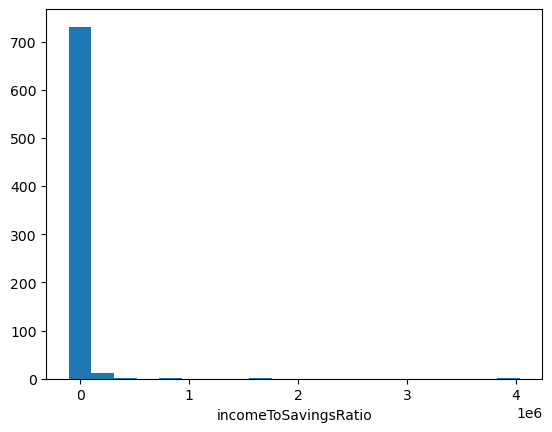

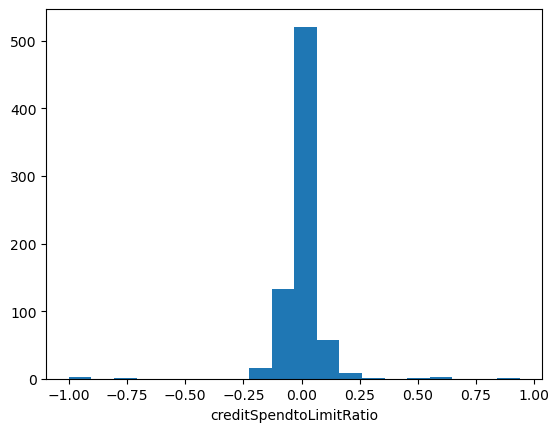

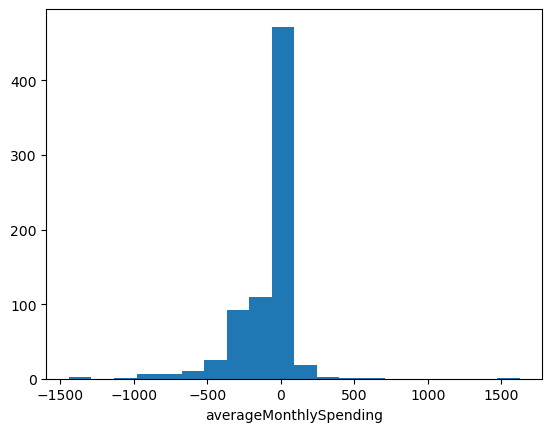

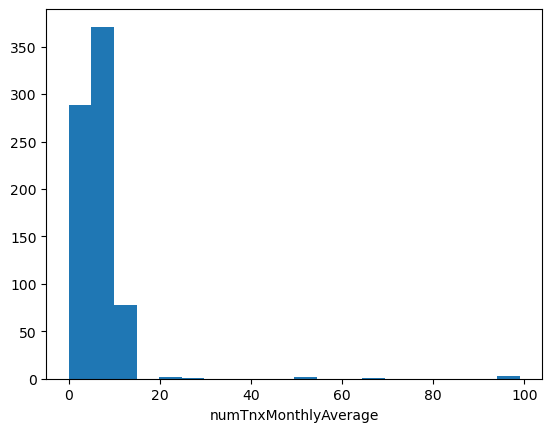

In [6]:
numerical_columns =  ['incomeToSavingsRatio',
                      'creditSpendtoLimitRatio',
                      'averageMonthlySpending',
                      'numTnxMonthlyAverage']
    
for col in numerical_columns:
    plt.hist(df[col], bins=20)
#     df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.show()

## Handling Outliers.
### Method 1: RobustScaler
* Decided to use RobustScaler because it's robust to outliers

In [7]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(df[numerical_columns])
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)
data_scaled_df.describe()

,incomeToSavingsRatio,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage
count,747.000000,747.000000,747.000000,747.000000
mean,21.905895,-0.255268,-0.468327,-0.230739
std,251.408567,5.082838,1.164210,0.878954
min,-159.520311,-49.507121,-8.344414,-0.916667
25%,0.000000,-0.940997,-0.944017,-0.916667
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.059003,0.055983,0.083333
max,6142.777367,46.447746,9.539719,10.083333


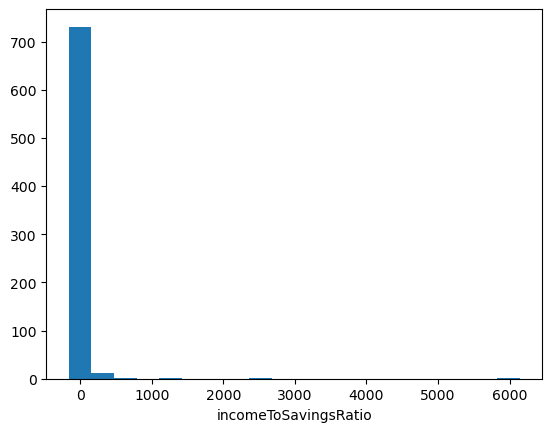

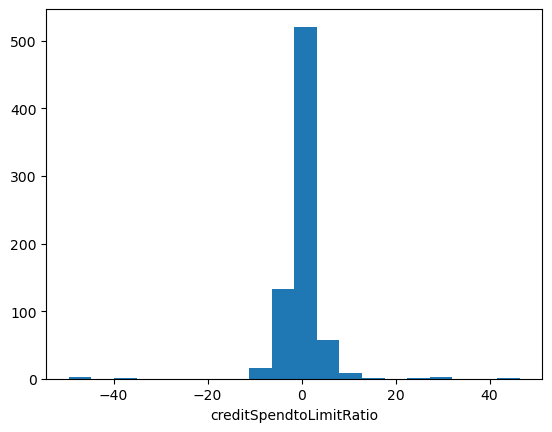

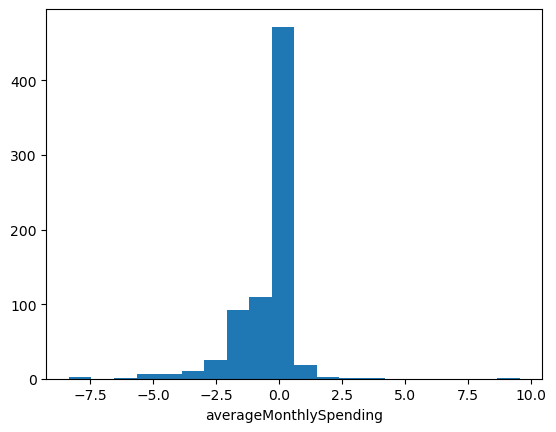

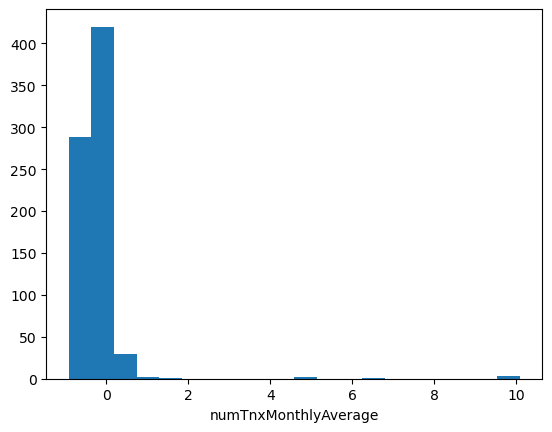

In [8]:
for col in numerical_columns:
    plt.hist(data_scaled_df[col], bins=20)
#     df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.show()

### Method 2. Converting to Categorical data then using RobustScaler

#### Step 1. Converting to Categorical data

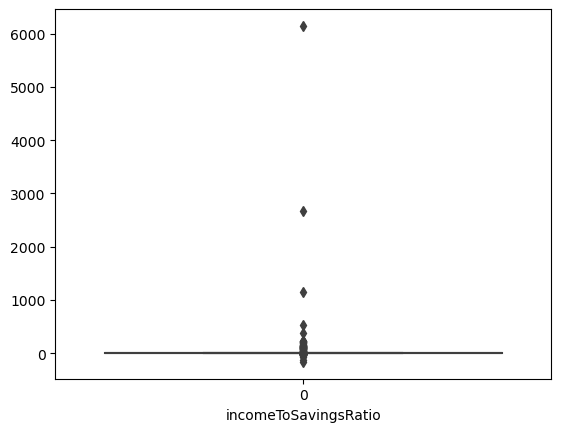

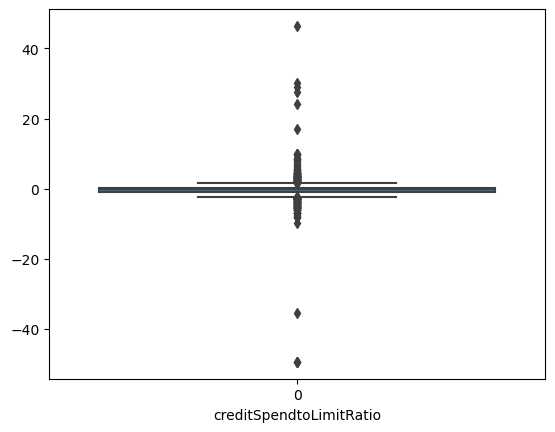

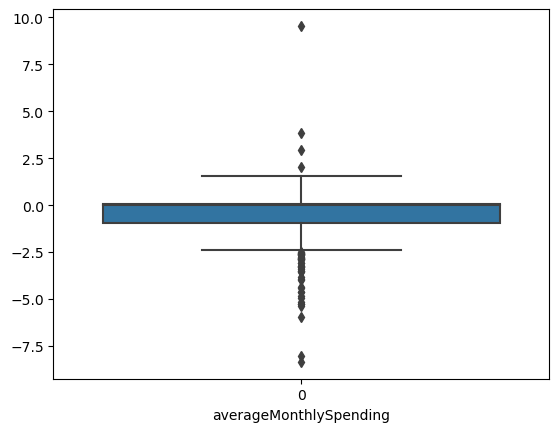

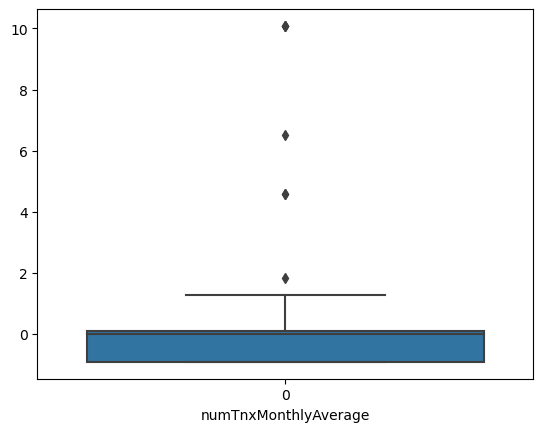

In [9]:
for col in numerical_columns:
    sns.boxplot(data_scaled_df[col])
#     df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.show()

**Observations**: incometoSavingsRatio has huge outliers. Rather than scale this data, it might be better to just convert it into categories

In [10]:
# using qcut to convert the incomeToSavingsRatio to equal bins
incomeToSavingsRanking = pd.qcut(df['incomeToSavingsRatio'], 
                        q=8,
                        duplicates='drop',
                       labels = ['Lowest', 'Low', 'Med', 'High', 'Highest'])

incomeToSavingsRanking.nunique(), incomeToSavingsRanking.unique()

(5,
 ['Low', 'Lowest', 'Highest', 'Med', 'High']
 Categories (5, object): ['Lowest' < 'Low' < 'Med' < 'High' < 'Highest'])

In [11]:
incomeToSavingsRanking

0          Low
1       Lowest
2      Highest
3      Highest
4      Highest
        ...   
742        Low
743     Lowest
744        Low
745        Low
746        Low
Name: incomeToSavingsRatio, Length: 747, dtype: category
Categories (5, object): ['Lowest' < 'Low' < 'Med' < 'High' < 'Highest']

In [12]:
## Convert Ordinal Categorical data to numeric using Label Encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['incomeToSavingsRanking'] = le.fit_transform(incomeToSavingsRanking)
df.drop(columns='incomeToSavingsRatio', inplace=True)
df.head()

,cust_id,hasSavings,hasCredit,creditSpendtoLimitRatio,hasChecking,averageMonthlySpending,numTnxMonthlyAverage,incomeToSavingsRanking
0,1362691,No,No,0.000000,No,0.000000,0.000000,2
1,1362487,Yes,Yes,-0.046533,Yes,-114.890833,4.333333,3
2,1363160,Yes,Yes,0.031669,No,0.000000,0.000000,1
3,1362752,Yes,Yes,0.200554,Yes,-40.327500,7.750000,1
4,1362548,Yes,Yes,0.173563,Yes,-494.062727,9.000000,1


#### Step 2. Using RobustScaler then MinMaxScaler

In [13]:
numerical_columns.remove('incomeToSavingsRatio')
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(df[numerical_columns])
tmp = pd.DataFrame(data_scaled, columns=numerical_columns)

## Applying MinMax Scalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(tmp)
scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)
scaled_df.describe()


,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage
count,747.000000,747.000000,747.000000
mean,0.513281,0.440395,0.062357
std,0.052971,0.065097,0.079905
min,0.000000,0.000000,0.000000
25%,0.506135,0.413797,0.000000
50%,0.515942,0.466582,0.083333
75%,0.516557,0.469712,0.090909
max,1.000000,1.000000,1.000000


## Scaling Categorical Values

It is recommended that categorical values should be scaled before clustering so as not to dominate the results

In [14]:
binary_cat_columns = ['hasSavings', 'hasCredit', 'hasChecking']
# change Nos to 0.5 and Yess to 1 to reduce its scaling
df_binary_categories =df[binary_cat_columns]
for col in binary_cat_columns:
    tmp = df[col].apply(lambda x: 0.5 if x=='No' else 1) 
    df_binary_categories[col] = tmp


/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_34653/3564979909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary_categories[col] = tmp


In [15]:
# checking the results
df_binary_categories['hasSavings'].value_counts()

1.0    420
0.5    327
Name: hasSavings, dtype: int64

In [16]:
## Scaling incomeToSavingsRatio
df['incomeToSavingsRanking'] = df['incomeToSavingsRanking']/4

In [17]:
df.describe()

,cust_id,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,incomeToSavingsRanking
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,-0.005156,-89.862092,6.173348,0.483936
std,2.925255e+02,0.102669,199.535463,7.910584,0.264162
min,1.362480e+06,-1.000000,-1439.755000,0.000000,0.000000
25%,1.362732e+06,-0.019007,-171.391310,0.000000,0.375000
50%,1.362993e+06,0.000000,-9.595000,8.250000,0.500000
75%,1.363244e+06,0.001192,0.000000,9.000000,0.500000
max,1.363495e+06,0.938203,1625.430000,99.000000,1.000000


In [18]:
# combining all results
for col in binary_cat_columns:
    scaled_df[col] = df_binary_categories[col]
scaled_df['incomeToSavingsRanking'] = df['incomeToSavingsRanking']
scaled_df.head()

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,hasSavings,hasCredit,hasChecking,incomeToSavingsRanking
0,0.515942,0.469712,0.000000,0.5,0.5,0.5,0.50
1,0.491933,0.432230,0.043771,1.0,1.0,1.0,0.75
2,0.532281,0.469712,0.000000,1.0,1.0,0.5,0.25
3,0.619416,0.456556,0.078283,1.0,1.0,1.0,0.25
4,0.605490,0.308527,0.090909,1.0,1.0,1.0,0.25


In [19]:
scaled_df.describe()

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,hasSavings,hasCredit,hasChecking,incomeToSavingsRanking
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,0.513281,0.440395,0.062357,0.781124,0.805890,0.848059,0.483936
std,0.052971,0.065097,0.079905,0.248221,0.243836,0.230120,0.264162
min,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.000000
25%,0.506135,0.413797,0.000000,0.500000,0.500000,0.500000,0.375000
50%,0.515942,0.466582,0.083333,1.000000,1.000000,1.000000,0.500000
75%,0.516557,0.469712,0.090909,1.000000,1.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


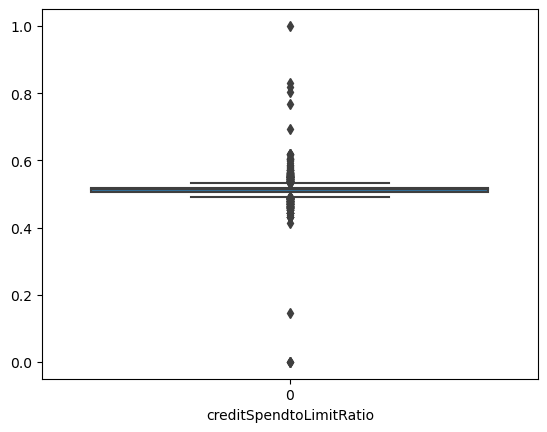

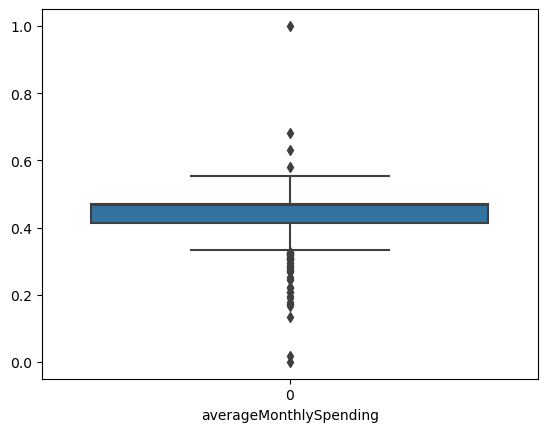

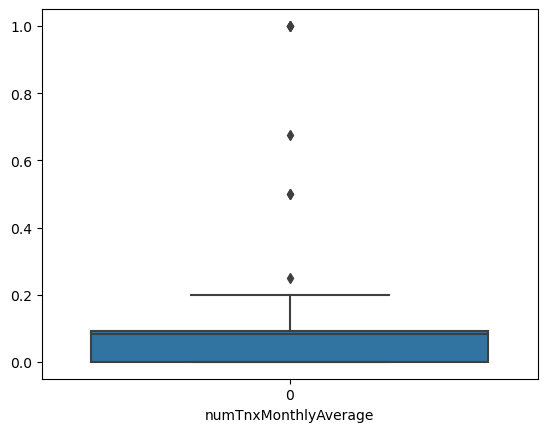

In [20]:
for col in numerical_columns:
    sns.boxplot(scaled_df[col])
#     df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.show()

In [21]:
# Saving the data
scaled_df.to_csv('../../data/banking_transactions_output_data/scaled_df.csv', index=False)
pd.read_csv('../../data/banking_transactions_output_data/scaled_df.csv')

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,hasSavings,hasCredit,hasChecking,incomeToSavingsRanking
0,0.515942,0.469712,0.000000,0.5,0.5,0.5,0.50
1,0.491933,0.432230,0.043771,1.0,1.0,1.0,0.75
2,0.532281,0.469712,0.000000,1.0,1.0,0.5,0.25
3,0.619416,0.456556,0.078283,1.0,1.0,1.0,0.25
4,0.605490,0.308527,0.090909,1.0,1.0,1.0,0.25
...,...,...,...,...,...,...,...
742,0.515942,0.423906,0.037037,0.5,0.5,1.0,0.50
743,0.442952,0.469712,0.000000,1.0,1.0,0.5,0.75
744,0.442236,0.445772,0.083333,0.5,1.0,1.0,0.50
745,0.516208,0.440327,0.090909,0.5,1.0,1.0,0.50
